In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv('train.csv')
asset = pd.read_csv('asset_details.csv')

In [131]:
asset

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [181]:
bnb = df[df['Asset_ID'] == 0]
btc = df[df['Asset_ID'] == 1]
bch = df[df['Asset_ID'] == 2]
ada = df[df['Asset_ID'] == 3]
doge = df[df['Asset_ID'] == 4]
eos = df[df['Asset_ID'] == 5]
eth = df[df['Asset_ID'] == 6]
etc = df[df['Asset_ID'] == 7]
iota = df[df['Asset_ID'] == 8]
ltc = df[df['Asset_ID'] == 9]
mkr = df[df['Asset_ID'] == 10]
xmr = df[df['Asset_ID'] == 11]
xlm = df[df['Asset_ID'] == 12]
trx = df[df['Asset_ID'] == 13]

In [95]:
# array contains all crypto data
# total = [bnb, btc, bch, ada, doge, eos, eth, etc, iota, ltc, mkr, xmr, xlm, trx]

In [96]:
# inspect start day and end date
# also change index to timestamp
#for id, crypto in enumerate(total):
#    crypto.set_index('timestamp', inplace=True)
#    start = crypto.index[0].astype('datetime64[s]')
#    end = crypto.index[-1].astype('datetime64[s]')
#    print('Asset_ID' + str(id) + ': starts from', start, 'to', end)
#    print()
# 3, 4, 8, 10, 12, 13
# ada, doge, iota, mkr, xlm, trx

Asset_ID0: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID1: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID2: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID3: starts from 2018-04-17T09:11:00 to 2021-09-21T00:00:00

Asset_ID4: starts from 2019-04-12T14:34:00 to 2021-09-21T00:00:00

Asset_ID5: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID6: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID7: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID8: starts from 2018-05-09T08:07:00 to 2021-09-21T00:00:00

Asset_ID9: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID10: starts from 2018-05-10T15:21:00 to 2021-09-21T00:00:00

Asset_ID11: starts from 2018-01-01T00:01:00 to 2021-09-21T00:00:00

Asset_ID12: starts from 2018-02-16T23:53:00 to 2021-09-21T00:00:00

Asset_ID13: starts from 2018-02-06T21:37:00 to 2021-09-21T00:00:00



In [182]:
# select those start at 2018-01-01 and end at 2021-09-21
# manipulate bnb, btc, bch, eos, eth, etc, ltc, xmr

fill_method = 'nearest'

# function that sets timestamp as index and fills na with forward fill
def fill_missing_value(data, fill_method):
    data.set_index('timestamp', inplace=True)
    timeframe = range(data.index[0], data.index[-1]+60, 60)
    data = data.reindex(timeframe, method=fill_method)
    # check NAs after filled index and using fill_method
    # print('Original missing values:', len(data[data.isna().any(axis=1)]))
    data['Target'] = data['Target'].fillna(method='pad')
    if data.isnull().values.any():
        data['Target'] = data['Target'].fillna(method='bfill')
    # check if filled all NAs
    # print('Still missing:', len(data[data.isna().any(axis=1)]))
    # print()
    return data

In [183]:
# fill missing values for cryptos that starts at 2018-01-01 
bnb = fill_missing_value(bnb, fill_method)
btc = fill_missing_value(btc, fill_method)
bch = fill_missing_value(bch, fill_method)
eos = fill_missing_value(eos, fill_method)
eth = fill_missing_value(eth, fill_method)
etc = fill_missing_value(etc, fill_method)
ltc = fill_missing_value(ltc, fill_method)
xmr = fill_missing_value(xmr, fill_method)

In [184]:
# fill missing values for cryptos that starts after 2018-01-01 
ada = fill_missing_value(ada, fill_method)
doge = fill_missing_value(doge, fill_method)
iota = fill_missing_value(iota, fill_method)
mkr = fill_missing_value(mkr, fill_method)
xlm = fill_missing_value(xlm, fill_method)
trx = fill_missing_value(trx, fill_method)

In [185]:
# will not use xmr, doge, iota, mkr, xlm for now since
# lets use bnb, btc, bch, eos, eth, etc, ltc, ada, trx
# use the latest start date among above cryptos 2018-04-17T09:11:00 
# timestamp 1523956260

start_date = 1523956260

# function that truncate data
def data_slicing(data, start_date):
    dat = data.reset_index()
    start_index = int(dat[dat['timestamp'] == start_date].index.values)
    dat = data[start_index:]
    # dat.set_index('timestamp', inplace=True)
    # print(len(dat))
    return dat

In [186]:
bnb = data_slicing(bnb, start_date)
btc = data_slicing(btc, start_date)
bch = data_slicing(bch, start_date)
eos = data_slicing(eos, start_date)
eth = data_slicing(eth, start_date)
etc = data_slicing(etc, start_date)
ltc = data_slicing(ltc, start_date)
ada = data_slicing(ada, start_date)
trx = data_slicing(trx, start_date)

In [188]:
# check cross-asset correlations in close price, volume, target return
# close price
dat_close = {'bnb': bnb['Close'], 'btc': btc['Close'], 'bch': bch['Close'], 'eos': eos['Close'], 
             'eth': eth['Close'], 'etc': etc['Close'], 'ltc': ltc['Close'], 'ada': ada['Close'],
             'trx': trx['Close']}

# volume
dat_volume = {'bnb': bnb['Volume'], 'btc': btc['Volume'], 'bch': bch['Volume'], 'eos': eos['Volume'], 
              'eth': eth['Volume'], 'etc': etc['Volume'], 'ltc': ltc['Volume'], 'ada': ada['Volume'],
              'trx': trx['Volume']}

# target
dat_target = {'bnb': bnb['Target'], 'btc': btc['Target'], 'bch': bch['Target'], 'eos': eos['Target'], 
              'eth': eth['Target'], 'etc': etc['Target'], 'ltc': ltc['Target'], 'ada': ada['Target'],
              'trx': trx['Target']}

close_agg = pd.DataFrame(data=dat_close)
volume_agg = pd.DataFrame(data=dat_volume)
target_agg = pd.DataFrame(data=dat_target)

In [189]:
# close price correlation
close_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,0.884862,0.458355,0.166197,0.947988,0.857244,0.842464,0.928532,0.881422
btc,0.884862,1.000000,0.409546,0.074662,0.905660,0.658520,0.874905,0.856582,0.785488
bch,0.458355,0.409546,1.000000,0.896951,0.527892,0.578763,0.704028,0.457224,0.736777
eos,0.166197,0.074662,0.896951,1.000000,0.219714,0.339155,0.465816,0.181592,0.533962
eth,0.947988,0.905660,0.527892,0.219714,1.000000,0.890923,0.856814,0.967143,0.870005
etc,0.857244,0.658520,0.578763,0.339155,0.890923,1.000000,0.722331,0.868205,0.795402
ltc,0.842464,0.874905,0.704028,0.465816,0.856814,0.722331,1.000000,0.777042,0.897286
ada,0.928532,0.856582,0.457224,0.181592,0.967143,0.868205,0.777042,1.000000,0.824226
trx,0.881422,0.785488,0.736777,0.533962,0.870005,0.795402,0.897286,0.824226,1.000000


<AxesSubplot:>

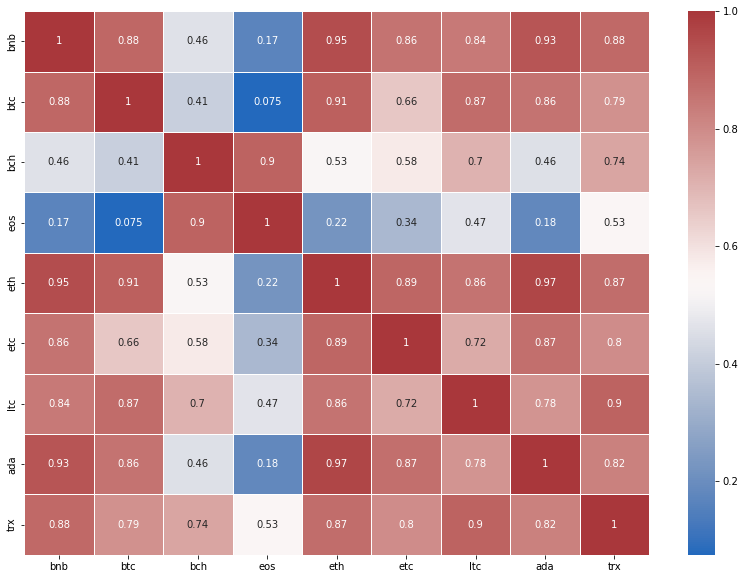

In [190]:
# close price correlation
plt.figure(figsize=(14, 10))
sns.heatmap(close_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [191]:
# volume correlation
volume_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,0.344598,0.318429,0.300058,0.354095,0.034521,0.319474,0.284698,0.276284
btc,0.344598,1.000000,0.544069,0.470981,0.696269,0.052824,0.542041,0.413634,0.344823
bch,0.318429,0.544069,1.000000,0.535029,0.572184,0.068015,0.568010,0.406903,0.398072
eos,0.300058,0.470981,0.535029,1.000000,0.509580,0.067797,0.533025,0.409970,0.454124
eth,0.354095,0.696269,0.572184,0.509580,1.000000,0.057271,0.579277,0.449514,0.391865
etc,0.034521,0.052824,0.068015,0.067797,0.057271,1.000000,0.061657,0.047965,0.050000
ltc,0.319474,0.542041,0.568010,0.533025,0.579277,0.061657,1.000000,0.434601,0.412190
ada,0.284698,0.413634,0.406903,0.409970,0.449514,0.047965,0.434601,1.000000,0.377024
trx,0.276284,0.344823,0.398072,0.454124,0.391865,0.050000,0.412190,0.377024,1.000000


<AxesSubplot:>

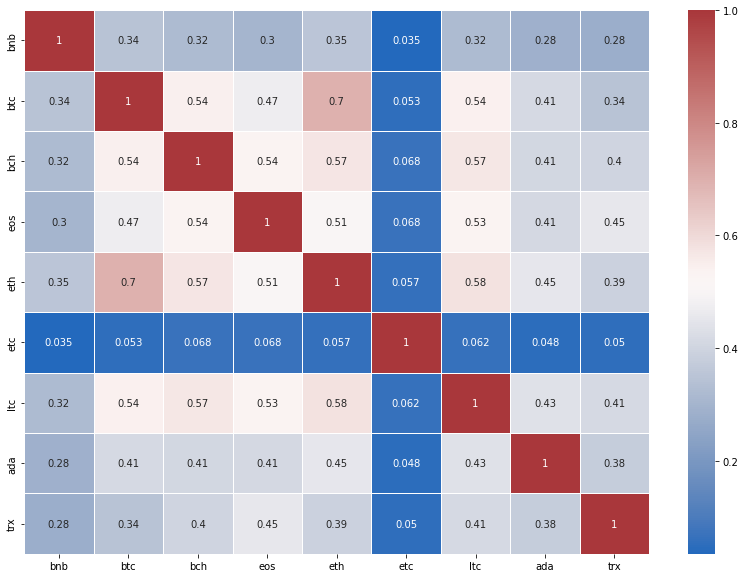

In [192]:
# volume correlation
plt.figure(figsize=(14, 10))
sns.heatmap(volume_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [193]:
# target correlation
target_agg.corr(method='pearson')

,bnb,btc,bch,eos,eth,etc,ltc,ada,trx
bnb,1.000000,-0.039445,0.046235,-0.056934,-0.068263,-0.020567,-0.050308,0.105387,0.025011
btc,-0.039445,1.000000,-0.047830,-0.037317,0.109085,-0.121316,0.044487,-0.131269,-0.056195
bch,0.046235,-0.047830,1.000000,0.049118,-0.050182,0.002560,0.046479,-0.010171,-0.006144
eos,-0.056934,-0.037317,0.049118,1.000000,0.026180,-0.003796,0.114204,-0.024323,0.075586
eth,-0.068263,0.109085,-0.050182,0.026180,1.000000,-0.119004,0.061126,-0.109913,-0.034590
etc,-0.020567,-0.121316,0.002560,-0.003796,-0.119004,1.000000,-0.045844,0.005753,-0.002633
ltc,-0.050308,0.044487,0.046479,0.114204,0.061126,-0.045844,1.000000,-0.060409,-0.001888
ada,0.105387,-0.131269,-0.010171,-0.024323,-0.109913,0.005753,-0.060409,1.000000,0.080310
trx,0.025011,-0.056195,-0.006144,0.075586,-0.034590,-0.002633,-0.001888,0.080310,1.000000


<AxesSubplot:>

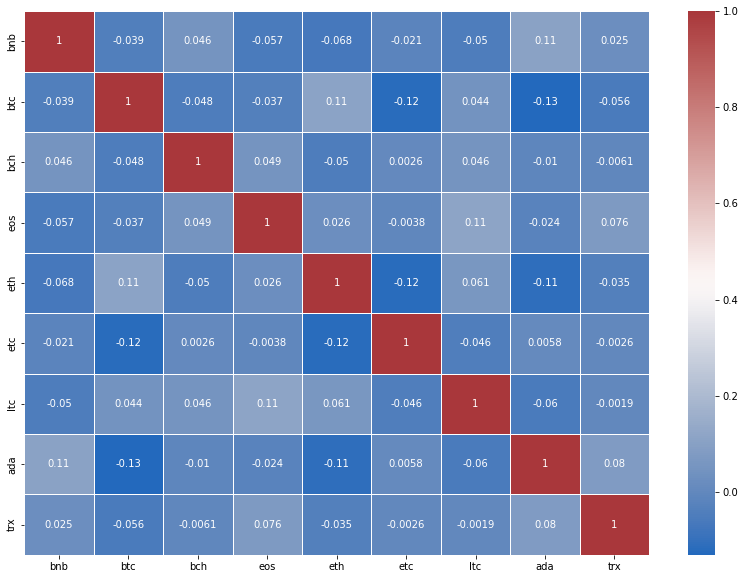

In [194]:
# target correlation
plt.figure(figsize=(14, 10))
sns.heatmap(target_agg.corr(method='pearson'),  
            cmap='vlag', 
            annot=True, 
            linewidth=0.5)

In [196]:
# export to csv
bnb.to_csv('bnb.csv', index=True)
btc.to_csv('btc.csv', index=True)
bch.to_csv('bch.csv', index=True)
eos.to_csv('eos.csv', index=True)
eth.to_csv('eth.csv', index=True)
etc.to_csv('etc.csv', index=True)
ltc.to_csv('ltc.csv', index=True)
ada.to_csv('ada.csv', index=True)
trx.to_csv('trx.csv', index=True)